# 478 Assignment-2, Xiaotong He

## 1.K-Nearest-Neighbor (KNN) classification on Newsgroups

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('trainMatrixModified.txt',header=None,sep='\t')
tr_lb=pd.read_csv('trainClasses.txt',header=None,sep='\t')
test=pd.read_csv('testMatrixModified.txt',header=None,sep='\t')
te_lb=pd.read_csv('testClasses.txt',header=None,sep='\t')

FileNotFoundError: [Errno 2] File b'trainMatrixModified.txt' does not exist: b'trainMatrixModified.txt'

In [8]:
train.T.head()
test.T.head()

0     1     2     3     4     5     6     7     8     9     ...  5490  \
0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0  ...   0.0   
1   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0  ...   0.0   

   5491  5492  5493  5494  5495  5496  5497  5498  5499  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 5500 columns]

In [9]:
def knn_classifier(tr_dt,tr_lb,object,k,measure):
    #training and testing datasets are transposed
    tr_dt=tr_dt.T
    tr_dt=np.array(tr_dt)
    object=object.T
    object=np.array(object)
    
    if measure == 0: #euclidean distances
        dists = np.sqrt(((tr_dt - object)**2).sum(axis=1))
    
    elif measure ==1: #cosine similarity
        D_norm = np.array([np.linalg.norm(tr_dt[i]) for i in range(len(tr_dt))])
        x_norm = np.linalg.norm(object)
        sims = np.dot(tr_dt,object)/(D_norm * x_norm)
        dists = 1 - sims
        
    idx = np.argsort(dists)[:k]
    label=[]
    #voting for class
    for i in idx:   
        label.append(tr_lb[1][i])
    if label.count(1)>label.count(0):
        clas =1
    elif label.count(1)<label.count(0):
        clas =0
    elif label.count(1)==label.count(0):
        clas=label[0]
    return clas, sorted(dists)[:k]  

In [88]:
def accuracy_knn(test,te_lb,train,tr_lb,k,measure):
    te_lb=te_lb[1]
    match=0
    for i in range(200):
        tag,array = knn_classifier(train,tr_lb,test[i],k,measure)
        if tag == te_lb[i]:
            match += 1
    accuracy= match/200
    return accuracy

In [90]:
#euclidean distances
for i in range(1,21):
    a=accuracy_knn(test,te_lb,train,tr_lb,i,0)
    print('k= {}: accuracy= {}'.format(i,a))    

k= 1: accuracy= 0.78
k= 2: accuracy= 0.78
k= 3: accuracy= 0.81
k= 4: accuracy= 0.81
k= 5: accuracy= 0.815
k= 6: accuracy= 0.835
k= 7: accuracy= 0.765
k= 8: accuracy= 0.8
k= 9: accuracy= 0.75
k= 10: accuracy= 0.85
k= 11: accuracy= 0.795
k= 12: accuracy= 0.845
k= 13: accuracy= 0.775
k= 14: accuracy= 0.815
k= 15: accuracy= 0.785
k= 16: accuracy= 0.8
k= 17: accuracy= 0.76
k= 18: accuracy= 0.785
k= 19: accuracy= 0.74
k= 20: accuracy= 0.765


In [91]:
#cosine similarity
for i in range(1,21):
    a=accuracy_knn(test,te_lb,train,tr_lb,i,1)
    print('k= {}: accuracy= {}'.format(i,a))    

k= 1: accuracy= 0.985
k= 2: accuracy= 0.985
k= 3: accuracy= 0.97
k= 4: accuracy= 0.985
k= 5: accuracy= 0.97
k= 6: accuracy= 0.985
k= 7: accuracy= 0.98
k= 8: accuracy= 0.98
k= 9: accuracy= 0.975
k= 10: accuracy= 0.985
k= 11: accuracy= 0.98
k= 12: accuracy= 0.975
k= 13: accuracy= 0.98
k= 14: accuracy= 0.98
k= 15: accuracy= 0.985
k= 16: accuracy= 0.98
k= 17: accuracy= 0.975
k= 18: accuracy= 0.975
k= 19: accuracy= 0.975
k= 20: accuracy= 0.975


#### Convert term weights to TFxIDF weights

In [102]:
#Find doucment frequencies for each term
DF = np.array([(train!=0).sum(0)])
NDocs = len(train[0])
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(train), dtype=float)*NDocs
# Convert each entry into IDF values
# Note that IDF is only a function of the term, so all rows will be identical.
DivM = np.divide(NMatrix, DF)
IDF = np.log2(DivM)
# Finally compute the TFxIDF values for each document-term entry
DT_tfidf = train * IDF

In [105]:
#with TF_IDF converted data
for i in range(1,21):
    b=accuracy_knn(test,te_lb,DT_tfidf,tr_lb,i,0)
    print('k= {}: accuracy= {}'.format(i,b))    

k= 1: accuracy= 0.515
k= 2: accuracy= 0.515
k= 3: accuracy= 0.515
k= 4: accuracy= 0.51
k= 5: accuracy= 0.51
k= 6: accuracy= 0.51
k= 7: accuracy= 0.505
k= 8: accuracy= 0.505
k= 9: accuracy= 0.5
k= 10: accuracy= 0.575
k= 11: accuracy= 0.515
k= 12: accuracy= 0.67
k= 13: accuracy= 0.52
k= 14: accuracy= 0.565
k= 15: accuracy= 0.53
k= 16: accuracy= 0.56
k= 17: accuracy= 0.53
k= 18: accuracy= 0.545
k= 19: accuracy= 0.52
k= 20: accuracy= 0.54


According to the accuracy reuslt of those three, runing knn with cosine similarity method has the highest accuracy then knn with Euclidean similarity method ranked second and knn with tf_idf data converted ranked third.

## 2.Classification using scikit-learn

In [107]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB #navie bayes
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn import tree #decision tree
from sklearn.model_selection import train_test_split #split data
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [108]:
#read data
data=pd.read_csv('bank_data.csv')
data.head()

id  age   income  children  gender      region married  car  \
0  ID12101   48  17546.0         1  FEMALE  INNER_CITY      NO   NO   
1  ID12102   40  30085.1         3    MALE        TOWN     YES  YES   
2  ID12103   51  16575.4         0  FEMALE  INNER_CITY     YES  YES   
3  ID12104   23  20375.4         3  FEMALE        TOWN     YES   NO   
4  ID12105   57  50576.3         0  FEMALE       RURAL     YES   NO   

  savings_acct current_acct mortgage  pep  
0           NO           NO       NO  YES  
1           NO          YES      YES   NO  
2          YES          YES       NO   NO  
3           NO          YES       NO   NO  
4          YES           NO       NO   NO

In [110]:
#data normalization between 0 and 1
num_data=data[['age','income','children']]
scaler = MinMaxScaler()
num_data=scaler.fit_transform(num_data)
num_data

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.6122449 , 0.21563448, 0.33333333],
       [0.44897959, 0.43139475, 1.        ],
       [0.67346939, 0.19893337, 0.        ],
       ...,
       [0.26530612, 0.18862466, 0.        ],
       [0.2244898 , 0.16686641, 0.        ],
       [0.40816327, 0.37265867, 0.        ]])

In [111]:
#one hot encoding for categorical data
cate_data=data[['gender','region','married','car','savings_acct','current_acct','mortgage']]
ohe = OneHotEncoder(handle_unknown='ignore')
a=ohe.fit_transform(cate_data).toarray()
  #merge num and cate
new_data=np.concatenate([num_data,a],1)
new_data.shape

(600, 19)

In [112]:
#class lable
pep=data['pep']
pep.head()

0    YES
1     NO
2     NO
3     NO
4     NO
Name: pep, dtype: object

In [113]:
#split dataset as training 80%, testing 20%
X_train, X_test, y_train, y_test = train_test_split(new_data, pep, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((480, 19), (120, 19))

### Classification-KNN

In [114]:
#build knn classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.predict(X_test)

array(['NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO',
       'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO'],
      dtype=object)

In [115]:
#confusion matrix
confusion_matrix(y_test,knn.predict(X_test))

array([[47, 19],
       [26, 28]])

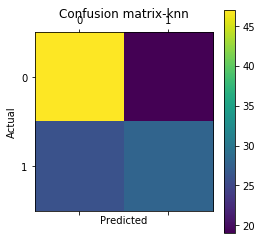

In [116]:
#confusion matrix visulization
plt.matshow(confusion_matrix(y_test,knn.predict(X_test)))
plt.title('Confusion matrix-knn')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [117]:
#classification repo
classification_report(y_test,knn.predict(X_test))

'              precision    recall  f1-score   support\n\n          NO       0.64      0.71      0.68        66\n         YES       0.60      0.52      0.55        54\n\n   micro avg       0.62      0.62      0.62       120\n   macro avg       0.62      0.62      0.62       120\nweighted avg       0.62      0.62      0.62       120\n'

In [290]:
#average accuracy score on training set
knn.score(X_train,y_train)

0.8020833333333334

In [291]:
#average accuracy score on testing set
knn.score(X_test,y_test)

0.625

In [119]:
#different values of k
for i in range(1,21):
    knnx = KNeighborsClassifier(n_neighbors=i)
    knnx.fit(X_train,y_train)
    knnx.predict(X_test)
    sc_tr=knnx.score(X_train,y_train).round(3)
    sc_te=knnx.score(X_test,y_test).round(3)
    gap=np.absolute(sc_tr-sc_te).round(3)
    print('k= {}, training accuracy = {}, testing accuracy = {}, gap ={}'.format(i,sc_tr,sc_te,gap))

k= 1, training accuracy = 1.0, testing accuracy = 0.658, gap =0.342
k= 2, training accuracy = 0.819, testing accuracy = 0.658, gap =0.161
k= 3, training accuracy = 0.802, testing accuracy = 0.625, gap =0.177
k= 4, training accuracy = 0.767, testing accuracy = 0.667, gap =0.1
k= 5, training accuracy = 0.769, testing accuracy = 0.675, gap =0.094
k= 6, training accuracy = 0.74, testing accuracy = 0.625, gap =0.115
k= 7, training accuracy = 0.744, testing accuracy = 0.683, gap =0.061
k= 8, training accuracy = 0.75, testing accuracy = 0.658, gap =0.092
k= 9, training accuracy = 0.758, testing accuracy = 0.633, gap =0.125
k= 10, training accuracy = 0.742, testing accuracy = 0.675, gap =0.067
k= 11, training accuracy = 0.75, testing accuracy = 0.658, gap =0.092
k= 12, training accuracy = 0.75, testing accuracy = 0.675, gap =0.075
k= 13, training accuracy = 0.748, testing accuracy = 0.7, gap =0.048
k= 14, training accuracy = 0.742, testing accuracy = 0.642, gap =0.1
k= 15, training accuracy = 

The best one is when k=18, the gap between training model and testing model is smallest.

### Classification-Decision Tree

In [310]:
#build tree classifier using default setting
tree=tree.DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree.predict(X_test)

array(['YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES'],
      dtype=object)

In [319]:
#confusion matrix
confusion_matrix(y_test,tree.predict(X_test))

array([[52, 14],
       [ 6, 48]])

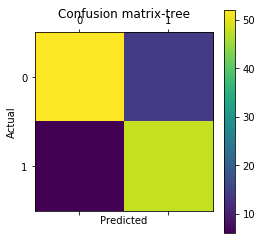

In [321]:
#confusion matrix visulization
plt.matshow(confusion_matrix(y_test,tree.predict(X_test)))
plt.title('Confusion matrix-tree')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [312]:
#classification repo
classification_report(y_test,tree.predict(X_test))

'              precision    recall  f1-score   support\n\n          NO       0.90      0.79      0.84        66\n         YES       0.77      0.89      0.83        54\n\n   micro avg       0.83      0.83      0.83       120\n   macro avg       0.84      0.84      0.83       120\nweighted avg       0.84      0.83      0.83       120\n'

In [316]:
#average accuracy score on training set
tree.score(X_train,y_train)

1.0

In [315]:
#average accuracy score on testing set
tree.score(X_test,y_test)

0.8333333333333334

### Classification-Naive Bayes

In [325]:
#build naive bayes classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.predict(X_test)

array(['YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO',
       'NO'], dtype='<U3')

In [326]:
#confusion matrix
confusion_matrix(y_test,gnb.predict(X_test))

array([[39, 27],
       [25, 29]])

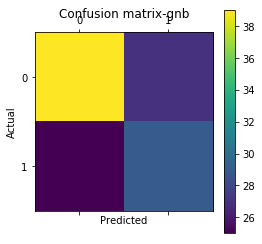

In [327]:
#confusion matrix visulization
plt.matshow(confusion_matrix(y_test,gnb.predict(X_test)))
plt.title('Confusion matrix-gnb')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [328]:
#classification repo
classification_report(y_test,gnb.predict(X_test))

'              precision    recall  f1-score   support\n\n          NO       0.61      0.59      0.60        66\n         YES       0.52      0.54      0.53        54\n\n   micro avg       0.57      0.57      0.57       120\n   macro avg       0.56      0.56      0.56       120\nweighted avg       0.57      0.57      0.57       120\n'

In [329]:
#average accuracy score on training set
gnb.score(X_train,y_train)

0.6770833333333334

In [330]:
#average accuracy score on testing set
gnb.score(X_test,y_test)

0.5666666666666667

## 3.Data Analysis and Predictive Modeling on Census data

In [5]:
#import data
am_df=pd.read_csv('adult-modified.csv', na_values='?')
am_df.head()

age workclass  education marital-status   race     sex  hours-per-week  \
0  39.0    Public         13         Single  White    Male              40   
1  50.0  Self-emp         13        Married  White    Male              13   
2  38.0   Private          9         Single  White    Male              40   
3  53.0   Private          7        Married  Black    Male              40   
4  28.0   Private         13        Married  Black  Female              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K

### a.Preprocessing and data analysis

In [6]:
#deal with missing data
    #remove missing value for cate data (you have to use subset method to do so)
new= am_df[pd.notnull(am_df['workclass'])]
    #fill in missing value with mean
age_mean = new.age.mean()
new.age.fillna(age_mean, axis=0, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [7]:
new.age.isna().count()

9412

### Exploratory Analysis

In [8]:
new.head()

age workclass  education marital-status   race     sex  hours-per-week  \
0  39.0    Public         13         Single  White    Male              40   
1  50.0  Self-emp         13        Married  White    Male              13   
2  38.0   Private          9         Single  White    Male              40   
3  53.0   Private          7        Married  Black    Male              40   
4  28.0   Private         13        Married  Black  Female              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K

In [417]:
new.shape

(9412, 8)

In [418]:
new.describe(include='all')

age workclass    education marital-status   race   sex  \
count   9412.000000      9412  9412.000000           9412   9412  9412   
unique          NaN         3          NaN              2      5     2   
top             NaN   Private          NaN        Married  White  Male   
freq            NaN      6947          NaN           4737   8062  6383   
mean      38.364632       NaN    10.125266            NaN    NaN   NaN   
std       12.962034       NaN     2.542118            NaN    NaN   NaN   
min       17.000000       NaN     1.000000            NaN    NaN   NaN   
25%       28.000000       NaN     9.000000            NaN    NaN   NaN   
50%       37.000000       NaN    10.000000            NaN    NaN   NaN   
75%       47.000000       NaN    13.000000            NaN    NaN   NaN   
max       90.000000       NaN    16.000000            NaN    NaN   NaN   

        hours-per-week income  
count      9412.000000   9412  
unique             NaN      2  
top                NaN  <=50K  
freq               NaN   7093  
mean         41.080217    NaN  
std          11.884590    NaN  
min           1.000000    NaN  
25%          40.000000    NaN  
50%          40.000000    NaN  
75%          45.000000    NaN  
max          99.000000    NaN

### histogram for numeric data

In [434]:
new.columns.values

array(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'], dtype=object)

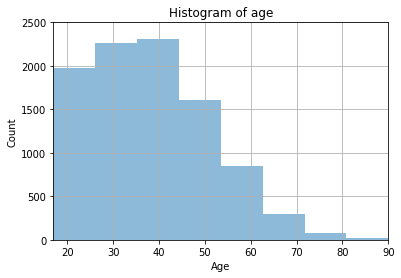

In [423]:
plt.hist(new["age"], bins=8, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of age')
plt.axis([new.age.min(), new.age.max(), 0, 2500])
plt.grid(True)

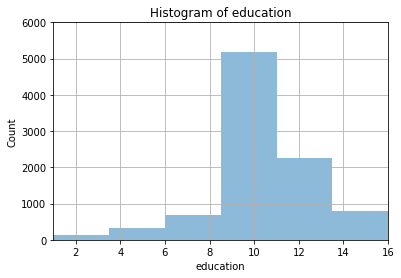

In [429]:
plt.hist(new["education"], bins=6, alpha=0.5)
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Histogram of education')
plt.axis([new.education.min(), new.education.max(), 0,6000])
plt.grid(True)

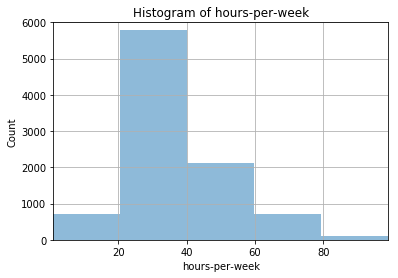

In [441]:
plt.hist(new["hours-per-week"], bins=5, alpha=0.5)
plt.xlabel('hours-per-week')
plt.ylabel('Count')
plt.title('Histogram of hours-per-week')
plt.axis([new['hours-per-week'].min(), new['hours-per-week'].max(), 0,6000])
plt.grid(True)

### bar chart for categorical data

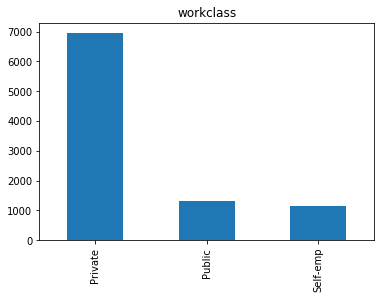

In [487]:
plt.title('workclass')
new['workclass'].value_counts().plot(kind='bar')

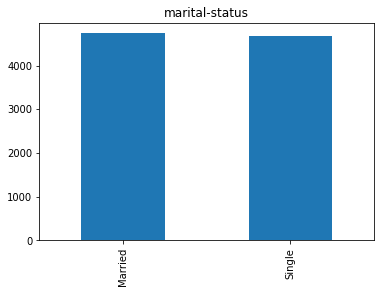

In [486]:
plt.title('marital-status')
new['marital-status'].value_counts().plot(kind='bar')

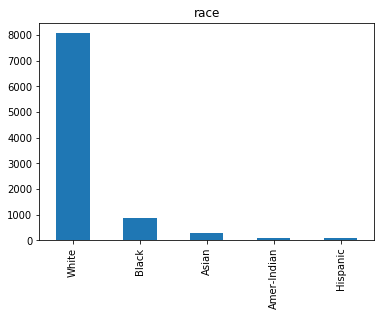

In [447]:
plt.title('race')
new['race'].value_counts().plot(kind='bar')

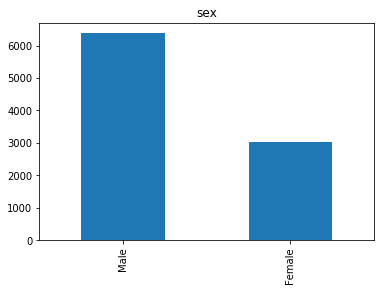

In [448]:
plt.title('sex')
new['sex'].value_counts().plot(kind='bar')

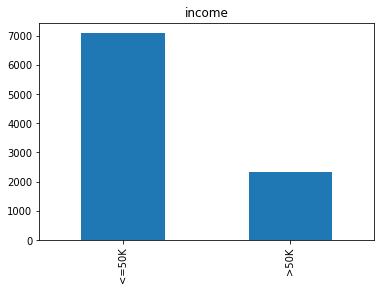

In [449]:
plt.title('income')
new['income'].value_counts().plot(kind='bar')

### Cross Tabulation

race       Amer-Indian  Asian  Black  Hispanic  White
education                                            
1                    0      0      1         0     11
2                    0      1      4         3     38
3                    0      4      5         1     71
4                    5      5     14         6    150
5                    0      3     19         2    118
6                    8      3     30         4    223
7                    4      6     49         4    261
8                    0      2     17         3     78
9                   35     67    350        23   2590
10                  26     64    206        11   1818
11                   5     10     33         4    337
12                   4      5     33         3    259
13                   5     75    102         8   1387
14                   0     27     20         1    467
15                   0     11      5         2    153
16                   0      8      4         0    101


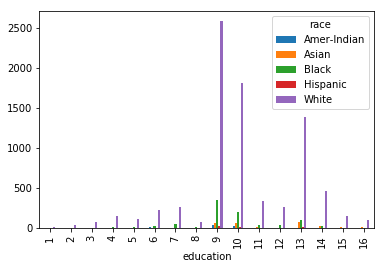

In [461]:
ct1 = pd.crosstab(new["education"],new["race"])
print(ct1)
plt.show(ct1.plot(kind="bar"))

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423


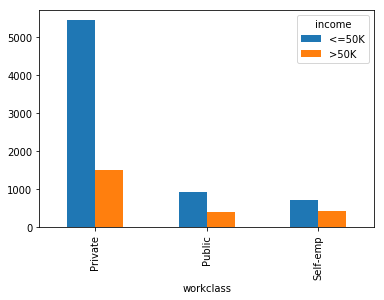

In [462]:
ct2 = pd.crosstab(new["workclass"],new["income"])
print(ct2)
plt.show(ct2.plot(kind="bar"))

race       Amer-Indian  Asian  Black  Hispanic  White
workclass                                            
Private             65    204    664        64   5950
Public              20     48    192         5   1052
Self-emp             7     39     36         6   1060


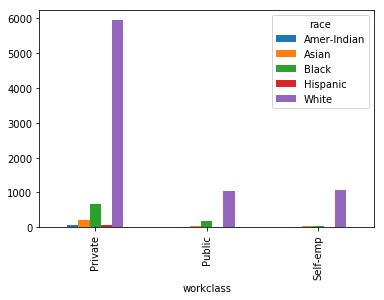

In [466]:
ct3 = pd.crosstab(new["workclass"],new["race"])
print(ct3)
plt.show(ct3.plot(kind="bar"))

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118


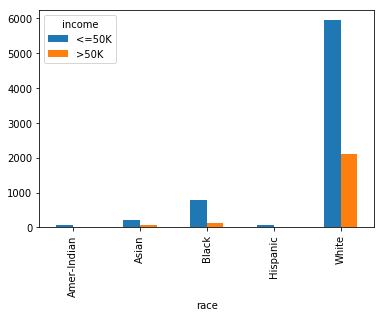

In [468]:
ct4 = pd.crosstab(new["race"],new["income"])
print(ct4)
plt.show(ct4.plot(kind="bar"))

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118


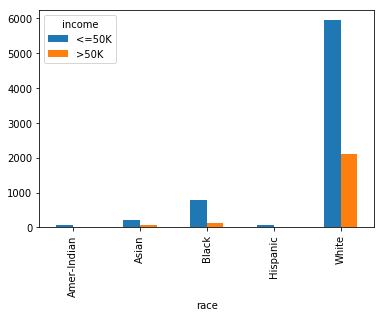

In [469]:
ct5 = pd.crosstab(new["race"],new["income"])
print(ct5)
plt.show(ct5.plot(kind="bar"))

In [9]:
#percentage of each race category that fall in low-income group
df=new[['race','income']]
df.head()
df_1=df[df.income == '<=50K']
per=df_1.groupby(['race']).count()
per['percentage %']=per.income/per.income.sum()*100

In [490]:
#comparsion of low income and high income
new.groupby(['income']).describe(include='all')

age                                                                \
         count unique top freq       mean        std   min   25%   50%   75%   
income                                                                         
<=50K   7093.0    NaN NaN  NaN  36.642971  13.339926  17.0  26.0  35.0  45.0   
>50K    2319.0    NaN NaN  NaN  43.630585  10.043148  19.0  36.0  43.0  50.0   

        ... hours-per-week                                                  \
        ...         unique top freq       mean        std  min   25%   50%   
income  ...                                                                  
<=50K   ...            NaN NaN  NaN  39.567038  11.868506  1.0  38.0  40.0   
>50K    ...            NaN NaN  NaN  45.708495  10.678794  1.0  40.0  40.0   

                    
         75%   max  
income              
<=50K   40.0  99.0  
>50K    50.0  99.0  

[2 rows x 77 columns]

### b.Predictive Modeling and Model Evaluation

In [10]:
#create dummy variables
new_dm=pd.get_dummies(new)
new_dm.head()

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   

   sex_Female  sex_Male  income_<=50K  income_>50K  
0           0         1             1            0  
1           0         1             1            0  
2           0         1             1            0  
3           0         1             1            0  
4           1         0             1            0

In [11]:
#subset dataset
new_tr=new_dm.drop(['income_<=50K'],axis=1)
new_tr.head()

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   

   sex_Female  sex_Male  income_>50K  
0           0         1            0  
1           0         1            0  
2           0         1            0  
3           0         1            0  
4           1         0            0

#### 10 folds cross validation

In [12]:
from sklearn.model_selection import cross_val_score
X=new_tr.drop(['income_>50K'],axis=1)
y=new_tr['income_>50K']

### Naive Bayes (Gaussian)

In [9]:
gnb1 = GaussianNB()
cv_gnb1=cross_val_score(gnb1,X,y, cv=10)
print('cross_validation:',cv_gnb1)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_gnb1.mean(), cv_gnb1.std() * 2))

cross_validation: [0.72823779 0.70488323 0.73142251 0.70456961 0.73326249 0.70669501
 0.7120085  0.7183847  0.73113709 0.70744681]
Overall Accuracy: 0.72 (+/- 0.02)


### Decision Tree (using "entropy")

In [13]:
tree1= tree.DecisionTreeClassifier(criterion='entropy')
cv_tree1=cross_val_score(tree1,X,y, cv=10)
print('cross_validation:',cv_tree1)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_tree1.mean(), cv_tree1.std() * 2))

cross_validation: [0.76645435 0.7462845  0.76751592 0.77577046 0.76408077 0.75345377
 0.75345377 0.79702444 0.77364506 0.75744681]
Overall Accuracy: 0.77 (+/- 0.03)


In [14]:
tree1.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
from sklearn.tree import export_graphviz
export_graphviz(tree1,out_file='tree.dot', feature_names=X.columns)

In [16]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [92]:
system(dot -Tpng tree.dot -o dtree.png)

['dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.385322 to fit']

In [93]:
from IPython.display import Image
Image(filename='dtree.png', width=800)

### Linear Discriminant Analysis

In [31]:
lda1=LinearDiscriminantAnalysis()
cv_lda1=cross_val_score(lda1,X,y, cv=10)
print('cross_validation:',cv_lda1)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_lda1.mean(), cv_lda1.std() * 2))

cross_validation: [0.81210191 0.80997877 0.79193206 0.81721573 0.80977683 0.78958555
 0.79914984 0.80871413 0.82040383 0.81702128]
Overall Accuracy: 0.81 (+/- 0.02)


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn